## Analýza časových údajů dat o veřejných zakázkách

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

Načtení dat

In [2]:
procurement = pd.read_csv('../data_2/procurement.csv')

Příprava dat

In [3]:
procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)

In [4]:
procurement["bids_submission_deadline"] = pd.to_datetime(procurement["bids_submission_deadline"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_contract_close"] = pd.to_datetime(procurement["date_of_contract_close"], format='%Y-%m-%d', errors = 'coerce')
procurement["date_of_publication"] = pd.to_datetime(procurement["date_of_publication"], format='%Y-%m-%d', errors = 'coerce')

Zobrazení nejstarších záznamů

In [5]:
procurement['date_of_publication'].sort_values()

23488   2013-02-28
25354   2013-09-18
20772   2014-10-17
12692   2015-06-03
31067   2016-01-15
           ...    
4863    2024-01-12
4786    2024-01-12
4861    2024-01-12
4873    2024-01-12
4853    2024-01-12
Name: date_of_publication, Length: 30130, dtype: datetime64[ns]

In [6]:
#procurement.dropna(subset=['date_of_contract_close', 'date_of_publication'], inplace=True)
#procurement.dropna(subset=['bids_submission_deadline', 'date_of_publication'], inplace=True)

Napočítání intervalů

In [7]:
procurement['publication_close_interval'] = (procurement['date_of_contract_close'] - procurement['date_of_publication']).dt.days
procurement['bids_close_interval'] = (procurement['bids_submission_deadline'] - procurement['date_of_publication']).dt.days

Popisná statistika intervalů:

In [8]:
procurement['publication_close_interval'].describe()

count    30129.000000
mean        -0.842444
std        195.248757
min      -7642.000000
25%         -4.000000
50%          9.000000
75%         39.000000
max       1491.000000
Name: publication_close_interval, dtype: float64

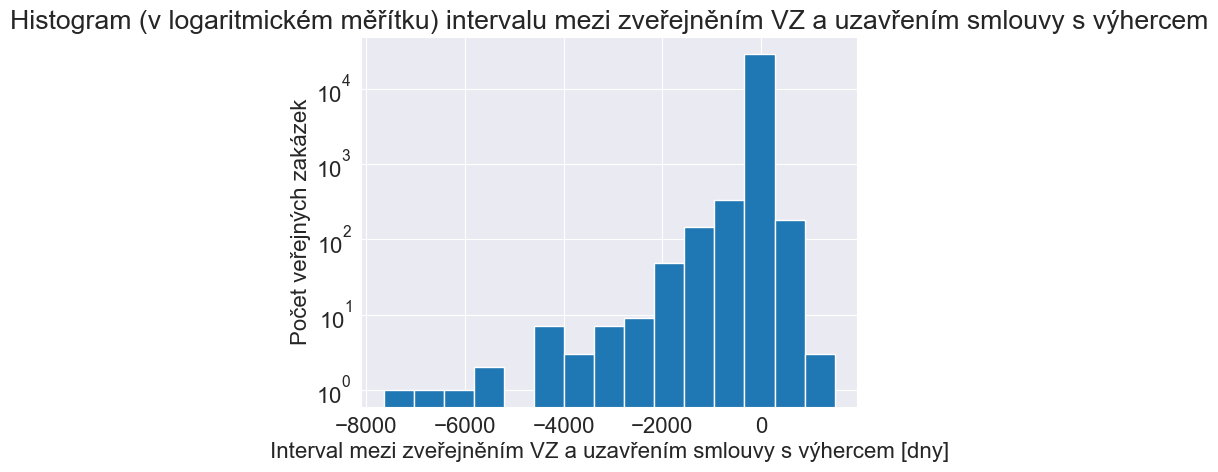

In [9]:
plt.hist(procurement['publication_close_interval'], bins=int(1 + np.log2(procurement.shape[0])))
plt.yscale('log')
plt.title('Histogram (v logaritmickém měřítku) intervalu mezi zveřejněním VZ a uzavřením smlouvy s výhercem')
plt.ylabel('Počet veřejných zakázek')
plt.xlabel('Interval mezi zveřejněním VZ a uzavřením smlouvy s výhercem [dny]')
plt.show()

In [10]:
procurement['bids_close_interval'].describe()

count    15438.000000
mean        19.682990
std         30.347115
min      -1421.000000
25%         10.000000
50%         14.000000
75%         23.750000
max        968.000000
Name: bids_close_interval, dtype: float64

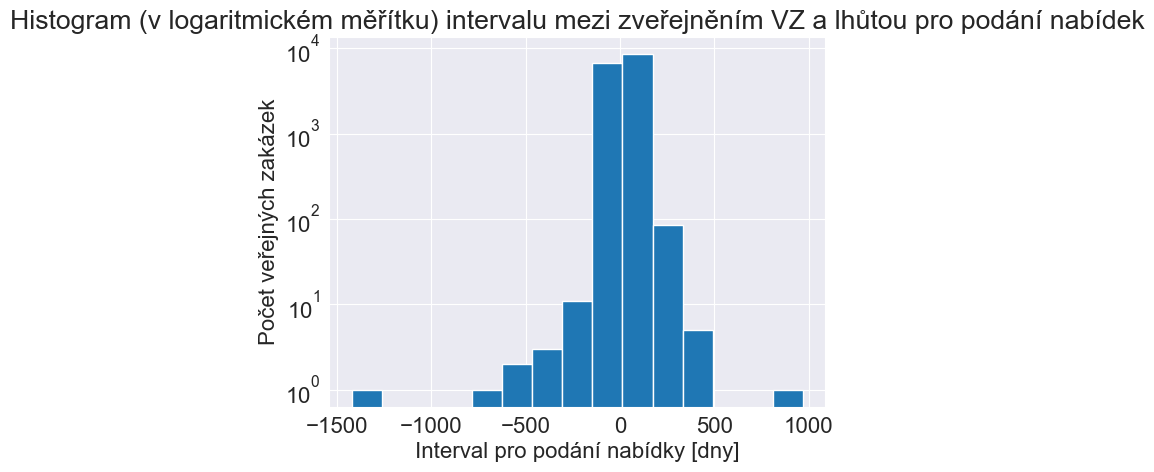

In [11]:
plt.hist(procurement['bids_close_interval'], bins=int(1 + np.log2(procurement.shape[0])))
plt.yscale('log')
plt.title('Histogram (v logaritmickém měřítku) intervalu mezi zveřejněním VZ a lhůtou pro podání nabídek')
plt.ylabel('Počet veřejných zakázek')
plt.xlabel('Interval pro podání nabídky [dny]')
plt.show()

In [12]:
import seaborn as sns
import numpy as np

Počet odlehlých pozorování pomocí metody IQR:

In [13]:
Q1 = procurement['bids_close_interval'].quantile(0.25)
Q3 = procurement['bids_close_interval'].quantile(0.75)
IQR = Q3 - Q1
outliers = procurement[(procurement['bids_close_interval'] < (Q1 - 1.5 * IQR)) | (procurement['bids_close_interval'] > (Q3 + 1.5 * IQR))]
print(f'Počet odlehlých pozorování v bids_close_interval: {outliers.shape[0]}')
print(f'Procento odlehlých pozorování: {outliers.shape[0] / procurement.shape[0] * 100}%')
data_without_outliers_bids = procurement[~procurement.index.isin(outliers.index)]

Počet odlehlých pozorování v bids_close_interval: 1078
Procento odlehlých pozorování: 3.5778294059077327%


In [14]:

Q1 = procurement['publication_close_interval'].quantile(0.25)
Q3 = procurement['publication_close_interval'].quantile(0.75)
IQR = Q3 - Q1
outliers = procurement[(procurement['publication_close_interval'] < (Q1 - 1.5 * IQR)) | (procurement['publication_close_interval'] > (Q3 + 1.5 * IQR))]
print(f'Počet odlehlých pozorování v publication_close_interval: {outliers.shape[0]}')
print(f'Procento odlehlých pozorování: {outliers.shape[0] / procurement.shape[0] * 100}%')
data_without_outliers_pub = procurement[~procurement.index.isin(outliers.index)]

Počet odlehlých pozorování v publication_close_interval: 3920
Procento odlehlých pozorování: 13.010288748755395%


C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


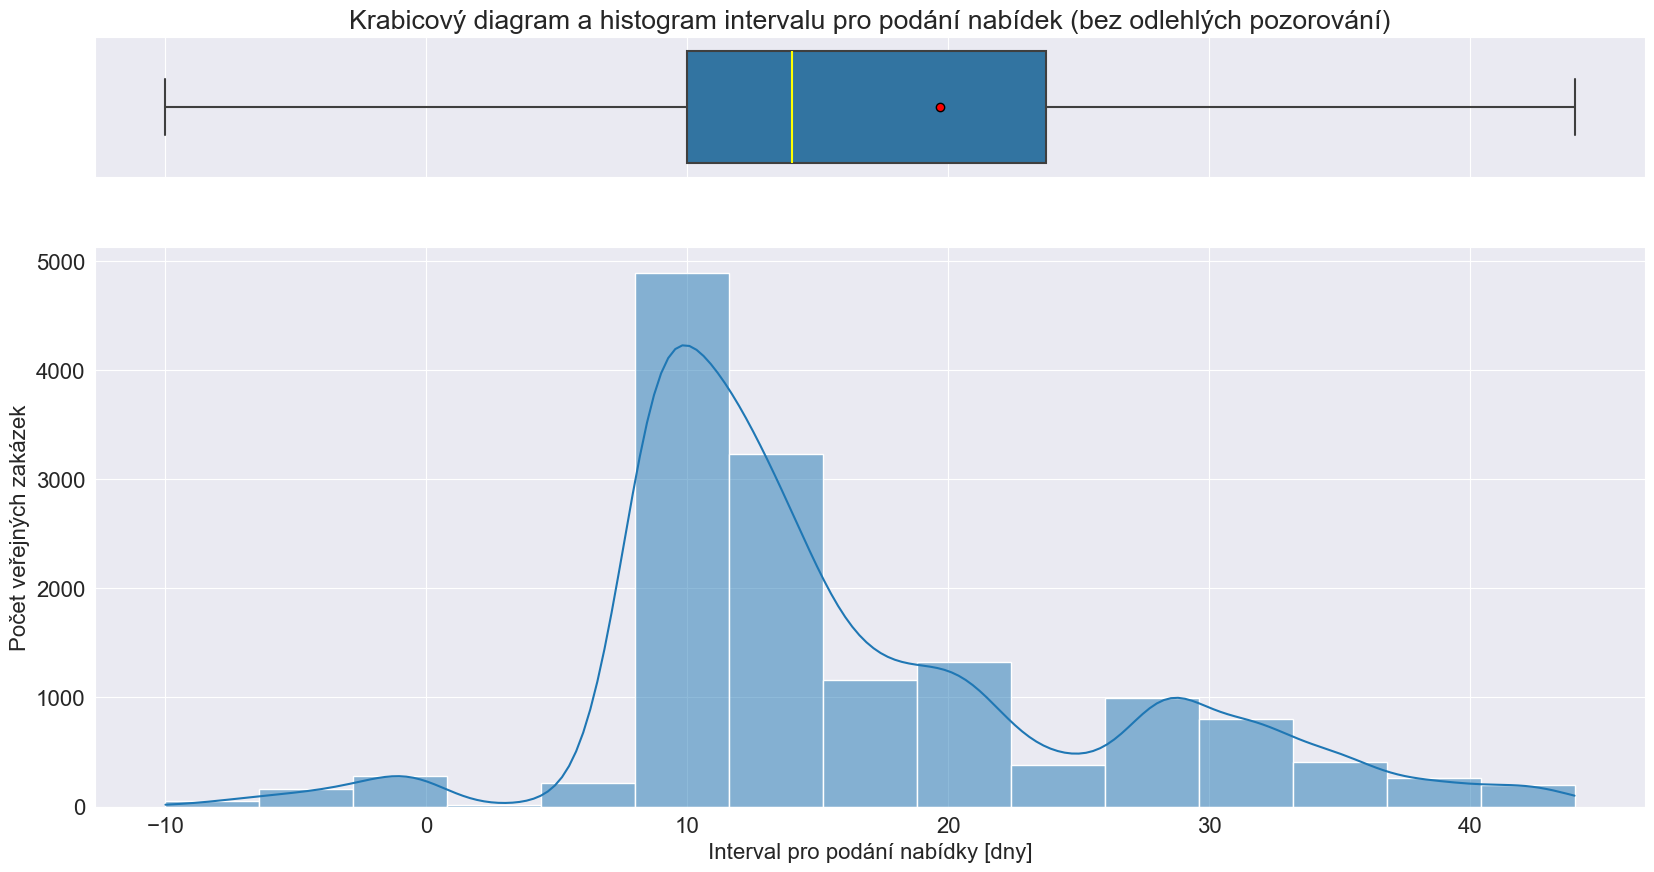

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(20, 10))
 
# Box plot
sns.boxplot(ax=ax_box,data=procurement, x='bids_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
ax_box.set(xlabel='')
ax_hist.set_xlabel('Interval pro podání nabídky [dny]')
ax_hist.set_ylabel('Počet veřejných zakázek')
ax_box.set_title('Krabicový diagram a histogram intervalu pro podání nabídek (bez odlehlých pozorování)')

# Histogram
sns.histplot(ax=ax_hist, data=data_without_outliers_bids, label='bids_close_interval', x='bids_close_interval', bins=int(1 + np.log2(data_without_outliers_bids.shape[0])), kde=True)
plt.show()

C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marti\PycharmProjects\bakalarka\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


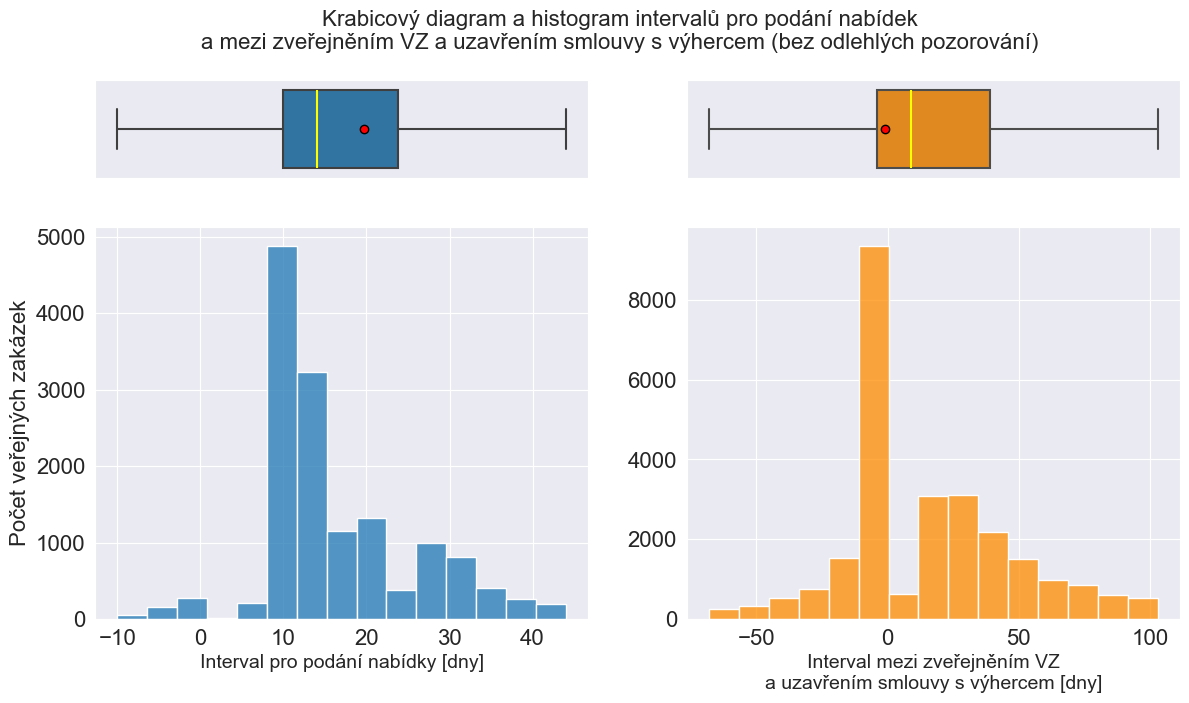

In [29]:
fig, axs = plt.subplots(2, 2, sharex=False, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(14, 7))
 
# Box plot
sns.boxplot(ax=axs[0, 0],data=procurement, x='bids_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'))
sns.boxplot(ax=axs[0, 1],data=procurement, x='publication_close_interval', showfliers=False, showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'), medianprops=dict(color='yellow'), color='darkorange')
sns.histplot(ax=axs[1, 0], data=data_without_outliers_bids, label='bids_close_interval', x='bids_close_interval', bins=int(1 + np.log2(data_without_outliers_bids.shape[0])))
sns.histplot(ax=axs[1, 1], data=data_without_outliers_pub, label='publication_close_interval', x='publication_close_interval', bins=int(1 + np.log2(data_without_outliers_pub.shape[0])), color='darkorange')
axs[0, 0].set(xlabel='')
axs[0, 1].set(xlabel='')
axs[1, 0].set_xlabel('Interval pro podání nabídky [dny]', fontsize=14)
axs[1, 1].set_xlabel('Interval mezi zveřejněním VZ\na uzavřením smlouvy s výhercem [dny]', fontsize=14)
axs[1, 0].set_ylabel('Počet veřejných zakázek')
fig.suptitle('Krabicový diagram a histogram intervalů pro podání nabídek\na mezi zveřejněním VZ a uzavřením smlouvy s výhercem (bez odlehlých pozorování)', size=16)
axs[0, 0].sharex(axs[1, 0])
axs[0, 1].sharex(axs[1, 1])
axs[0, 0].xaxis.set_visible(False)
axs[0, 1].xaxis.set_visible(False)
axs[1, 1].set(ylabel='')
plt.show()

Červeně je zvýrazněn průměr, žlutě medián

Počet záporných intervalů:

In [17]:
neg_pci = procurement[procurement['publication_close_interval'] < 0].shape[0] / procurement.shape[0] * 100
neg_bci = procurement[procurement['bids_close_interval'] < 0].shape[0] / procurement.shape[0] * 100
print(f'Procento záporných intervalů mezi zveřejněním VZ a uzavřením smlouvy s výhercem: {neg_pci:.2f}%')
print(f'Procento záporných intervalů mezi zveřejněním VZ a lhůtou pro podání nabídek: {neg_bci:.2f}%')

Procento záporných intervalů mezi zveřejněním VZ a uzavřením smlouvy s výhercem: 38.08%
Procento záporných intervalů mezi zveřejněním VZ a lhůtou pro podání nabídek: 1.74%


Přehle záporných intervalů mezi zveřejněním VZ a uzavřením smlouvy s výhercem pro jednotlivé typy zadávacího řízení:

In [18]:
procurement[procurement['publication_close_interval'] < 0]['type_of_procedure'].value_counts()

type_of_procedure
Zadávání VZ na základě rámcové dohody bez obnovení soutěže (mimo zadávací řízení)          3051
Přímé zadání                                                                               1992
Uzavřená výzva                                                                             1732
Zadávání VZ na základě rámcové dohody bez obnovení soutěže na základě zadávacího řízení    1193
Zadávání VZ na základě rámcové dohody s obnovením soutěže na základě zadávacího řízení     1096
Zadávání VZ v DNS                                                                           927
Zadávání VZ na základě rámcové dohody s obnovením soutěže (mimo zadávací řízení)            449
Jednací řízení bez uveřejnění                                                               373
Otevřená výzva                                                                              223
Zadávání VZ na základě RS s jedním uchazečem (mimo režim ZVZ)                               189
Zadávání VZ na základě

Zobrazení zakázek se záporným intervalem mezi zveřejněním VZ a uzavřením smlouvy s výhercem a s nejvyšší cenou v režimu otevřeného řízení:

In [19]:
procurement[(procurement['publication_close_interval'] < 0) & (procurement['type_of_procedure'] == 'Otevřené řízení')].sort_values(by='contract_price_with_amendments_vat', ascending=False)

,id,bids_submission_deadline,code_from_nipez_codelist,contract_price,contract_price_vat,contract_price_with_amendments,contract_price_with_amendments_vat,date_of_contract_close,date_of_publication,is_association_of_suppliers,...,place_of_performance,public_contract_regime,system_number,type,type_of_procedure,contact_person_id,contracting_authority_id,supplier_id,publication_close_interval,bids_close_interval
31329,31403,NaT,NaN,2.796058e+09,3.075664e+09,2.796058e+09,3.075664e+09,2021-11-19,2023-03-16,False,...,NaN,NaN,N006/23/V00007207,Public contract for deliveries,Otevřené řízení,1892,155,1379,-482.0,NaN
31340,31414,NaT,NaN,4.674732e+08,5.656426e+08,4.674732e+08,5.656426e+08,2021-10-20,2022-03-16,False,...,NaN,NaN,N006/22/V00005964,Public contract for services,Otevřené řízení,1412,155,1379,-147.0,NaN
9041,13995,NaT,NaN,9.917355e+07,1.200000e+08,9.917355e+07,1.200000e+08,2018-05-24,2019-09-23,False,...,NaN,NaN,N006/19/V00027242,Public contract for deliveries,Otevřené řízení,1645,1,7597,-487.0,NaN
27320,27354,NaT,44520000-1,2.319397e+07,2.806470e+07,2.319397e+07,2.806470e+07,2019-08-21,2023-04-24,False,...,NaN,Above-limit public contract,N006/23/V00011308,Public contract for deliveries,Otevřené řízení,2951,1278,11131,-1342.0,NaN
31339,31413,NaT,NaN,2.047173e+07,2.477080e+07,2.047173e+07,2.477080e+07,2021-08-06,2022-03-16,False,...,NaN,NaN,N006/22/V00005954,Public contract for services,Otevřené řízení,1412,155,1379,-222.0,NaN
21702,21675,NaT,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,...,NaN,Above-limit public contract,N006/22/V00000908,Public contract for services,Otevřené řízení,1427,1060,9582,-5.0,NaN
21701,21674,NaT,NaN,1.782328e+07,2.049677e+07,1.782328e+07,2.049677e+07,2022-01-12,2022-01-17,False,...,NaN,Above-limit public contract,N006/22/V00000908,Public contract for services,Otevřené řízení,1427,1060,5756,-5.0,NaN
445,472,NaT,72000000-5,1.614300e+07,1.953303e+07,1.614300e+07,1.953303e+07,2023-10-25,2023-11-29,False,...,Česká republika,NaN,N006/23/V00023568,Public contract for services,Otevřené řízení,205,110,557,-35.0,NaN
21190,21168,NaT,NaN,1.658870e+07,1.907700e+07,1.658870e+07,1.907700e+07,2022-01-13,2023-07-13,False,...,NaN,Above-limit public contract,N006/23/V00019842,Public contract for services,Otevřené řízení,115,85,9582,-546.0,NaN
21189,21167,NaT,NaN,1.658870e+07,1.907700e+07,1.658870e+07,1.907700e+07,2022-01-13,2023-07-13,False,...,NaN,Above-limit public contract,N006/23/V00019842,Public contract for services,Otevřené řízení,115,85,1468,-546.0,NaN
